In [1]:
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import numpy as np
import os

# Make data 

In [4]:
nside = 512
ells = []
i = 11.5
while i <= 3*nside: #l[-1]:
    ells.append(round(i))
    #i = i*(1+i/(3 * nside))
    i = i+40*(1+i/500)
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [5]:
cosmo = ccl.boltzmann.classy.Class()
params = {'h': 0.67,
'Omega_cdm': 0.25, #0.237153,
'Omega_b': 0.05,
'n_s': 0.9649,
'ln10^{10}A_s': 3.045}
cosmo.set(params)
cosmo.compute()
z_arr = np.arange(0, 1.1, 0.1)
b_arr = 2.00 *np.ones(len(z_arr))
X_arr = [cosmo.angular_distance(z)*(1+z) for z in z_arr]
dNdz = np.sin(z_arr*np.pi)**2
nz = [list(z_arr), list(dNdz)]
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
clustering_t = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z_arr, dNdz), bias=(z_arr, b_arr))
lensing_t = ccl.WeakLensingTracer(cosmo, dndz=(z_arr, dNdz))
CMBlensing_t = ccl.CMBLensingTracer(cosmo, 1100)


lensing_lensing_cl = ccl.angular_cl(cosmo, lensing_t, lensing_t, ell_arr) 
clustering_lensing_cl = ccl.angular_cl(cosmo, clustering_t, lensing_t, ell_arr) 
clustering_clustering_cl = ccl.angular_cl(cosmo, clustering_t, clustering_t, ell_arr) 
CMBlensing_CMBlensing_cl = ccl.angular_cl(cosmo, CMBlensing_t, CMBlensing_t, ell_arr) 
CMBlensing_clustering_cl = ccl.angular_cl(cosmo, CMBlensing_t, clustering_t, ell_arr)

# Plot Tracers

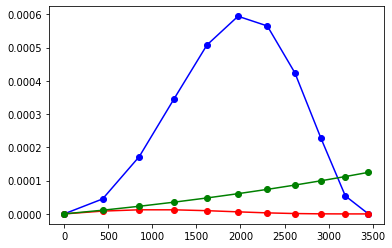

In [13]:
plt.plot(X_arr, clustering_t.get_kernel(X_arr)[0], 'bo-', label='Clustering')
plt.plot(X_arr, lensing_t.get_kernel(X_arr)[0], 'ro-', label='Lensing')
plt.plot(X_arr, CMBlensing_t.get_kernel(X_arr)[0], 'go-', label='CMBk')

# Plot Cls

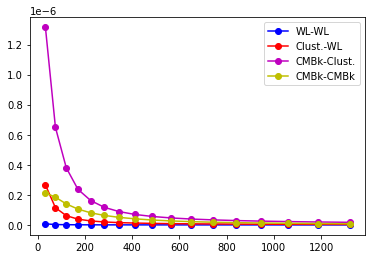

In [6]:
plt.plot(ell_arr, lensing_lensing_cl, 'bo-', label='WL-WL')
plt.plot(ell_arr, clustering_lensing_cl, 'ro-', label='Clust.-WL')
plt.plot(ell_arr, CMBlensing_clustering_cl, 'mo-', label='CMBk-Clust.')
plt.plot(ell_arr, CMBlensing_CMBlensing_cl, 'yo-', label='CMBk-CMBk')
plt.legend()
plt.show()

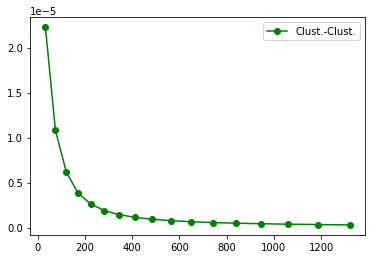

In [7]:
plt.plot(ell_arr, clustering_clustering_cl, 'go-', label='Clust.-Clust.')
plt.legend()
plt.show()

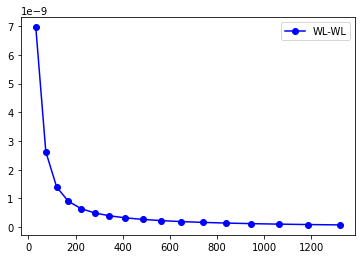

In [8]:
plt.plot(ell_arr, lensing_lensing_cl, 'bo-', label='WL-WL')
plt.legend()
plt.show()

# Save data

In [ ]:
save_cls = True
save_tracers = True

In [ ]:
if save_cls:
    np.savetxt('WL_WL_cl.txt', lensing_lensing_cl)
    np.savetxt('Clust_WL_cl.txt', clustering_lensing_cl)
    np.savetxt('Clust_Clust_cl.txt', clustering_clustering_cl)
    np.savetxt('CMBk_CMBk_cl.txt', CMBlensing_CMBlensing_cl)
    np.savetxt('CMBk_Clust_cl.txt', CMBlensing_CMBlensing_cl)
if save_tracers:
    np.savetxt('/home/jaimerz/PhD/LimberJack.jl/clustering_tracer.txt', clustering_t.get_kernel(X_arr))
    np.savetxt('/home/jaimerz/PhD/LimberJack.jl/lensing_tracer.txt', lensing_t.get_kernel(X_arr))
    np.savetxt('/home/jaimerz/PhD/LimberJack.jl/CMBlensing_tracer.txt', CMBlensing_t.get_kernel(X_arr))